# This notebook is codes for using logistic regression from scikit learn<br> for an assignment for a data science class.



# Part A


In [40]:

import pandas as pd

import numpy as np



heart_df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

heart_df.head()


,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No



# Part B


In [41]:

from sklearn import preprocessing

heart_feature_columns = list ( heart_df.columns )

heart_feature_columns.remove('AHD')

Heart_Feature_Matrix = heart_df[heart_feature_columns]

from sklearn import preprocessing

Heart_Feature_Matrix_Scaled = preprocessing.scale(Heart_Feature_Matrix)

Heart_Label_Vector = heart_df['AHD']




# Part C



In [42]:

from sklearn.model_selection import train_test_split

HFMS_Training, HFMS_Testing, HLV_Training, HLV_Testing = train_test_split(Heart_Feature_Matrix_Scaled, Heart_Label_Vector, test_size = 0.25, random_state = 3)




# Part D


In [43]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1500)

log_reg_classifier.fit(HFMS_Training, HLV_Training)

label_log_reg_prediction = log_reg_classifier.predict(HFMS_Testing)

log_reg_acc_score = accuracy_score(HLV_Testing, label_log_reg_prediction)

print (log_reg_acc_score)


0.7183098591549296



# Part D Results
At this time, the accuracy is calculated to be: 0.7183098591549296





# Part D Continued




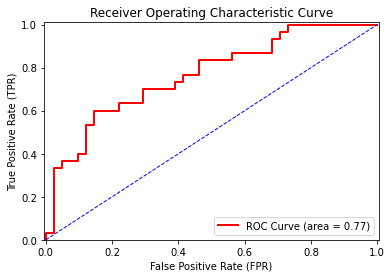

In [44]:



log_reg_prob =  log_reg_classifier.predict_proba(HFMS_Testing)


#note second prob is 'Yes', first prob is 'No'

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve (HLV_Testing, log_reg_prob[:,1], pos_label = 'Yes')

AUC = metrics.auc(fpr,tpr)


# need this to generate graphs and cruves in python
import matplotlib.pyplot as plt

# need this to tell python not to 
# to keep the figures in the current page
%matplotlib inline

plt.figure()

# ROC Curve
plt.plot(fpr, tpr, color='red', lw=2, label = 'ROC Curve (area = %0.2f)' % AUC)

# Random Guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# need this to define x and y axes ranges
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Titles, and Legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= 'lower right')

plt.show()
